# Assignment 1

Machine Learning (BBWL), Michael Mommert, FS2023, University of St. Gallen

The **goal** of this assignment is to implement a $k$-Nearest Neighbor (kNN) classifier that performs classification on the accompanied dataset. The dataset is 5-dimensional and consists of numerical features, only. Each datapoint belongs to either of three classes. Train a kNN classifier in such a way as to maximize its performance and to generalize well.

The general **objectives** are:
* to implement the ML pipeline using *scikit-learn* as discussed in the lecture and the lab course, following best practices;
* to properly perform hyperparameter tuning from which clearly follows which value of $k$ has been chosen and why;
* to compare the performance of the best trained model on the training, validation and test datasets, preventing both overfitting and underfitting.

This assignment will be **graded** based on:
* whether these objectives have been achieved;
* whether the solution follows best practices;
* how well the approach is documented (e.g., using text cells, plots, etc.);
* how clean the code is;
* the performance of the trained model.

There are no restrictions on the resources that you can use -- collaborating on assignments is allowed -- but students are not allowed to submit identical code.

Please submit your runnable Notebook to [michael.mommert@unisg.ch](mailto:michael.mommert@unisg.ch) **before 26 March 2023, 23:59**. Please include your name in the Notebook filename.

-----

The following code cell will import the dataset used in this assignment. Please do not modify this code cell.

In [1]:
import numpy as np
from urllib.request import urlopen
from io import BytesIO

# load data as binary npy file
raw_data = np.load(BytesIO(urlopen("https://raw.githubusercontent.com/HSG-AIML-Teaching/MLBBWL-2023FS/main/assignment_1/data.npy").read()))

x = raw_data[:,:5]  # this is your input data
y = raw_data[:, 5]  # this is your target vector

x.shape, y.shape

((2000, 5), (2000,))

-----

Please add your code in the following ... Good Luck!

1. Setup Environment

In [2]:
# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import matplotlib data visualization library
import matplotlib.pyplot as plt

# import seaborn data visualization library
import seaborn as sns
from seaborn import color_palette

# import pandas data manipulation library
import pandas as pd

-----

In [5]:
# turn numpy arrays into pandas dataframes
df = pd.DataFrame(x, columns=["x1", "x2", "x3", "x4", "x5"])
df["target"] = y

# show first 5 rows of data
df.head()

,x1,x2,x3,x4,x5,target
0,-2.109198,-1.443881,-0.100620,-90.916762,-0.893275,2.0
1,-4.469359,-0.237587,-0.116520,3.983598,0.121665,1.0
2,5.754084,-0.459973,0.079301,-87.950730,-0.062872,2.0
3,-2.314240,1.162550,-0.015752,91.994132,0.973047,1.0
4,5.211160,-0.431351,0.063959,-85.552838,0.038414,2.0


In [6]:
# count the number of samples per class
df['target'].value_counts()

1.0    672
2.0    665
0.0    663
Name: target, dtype: int64

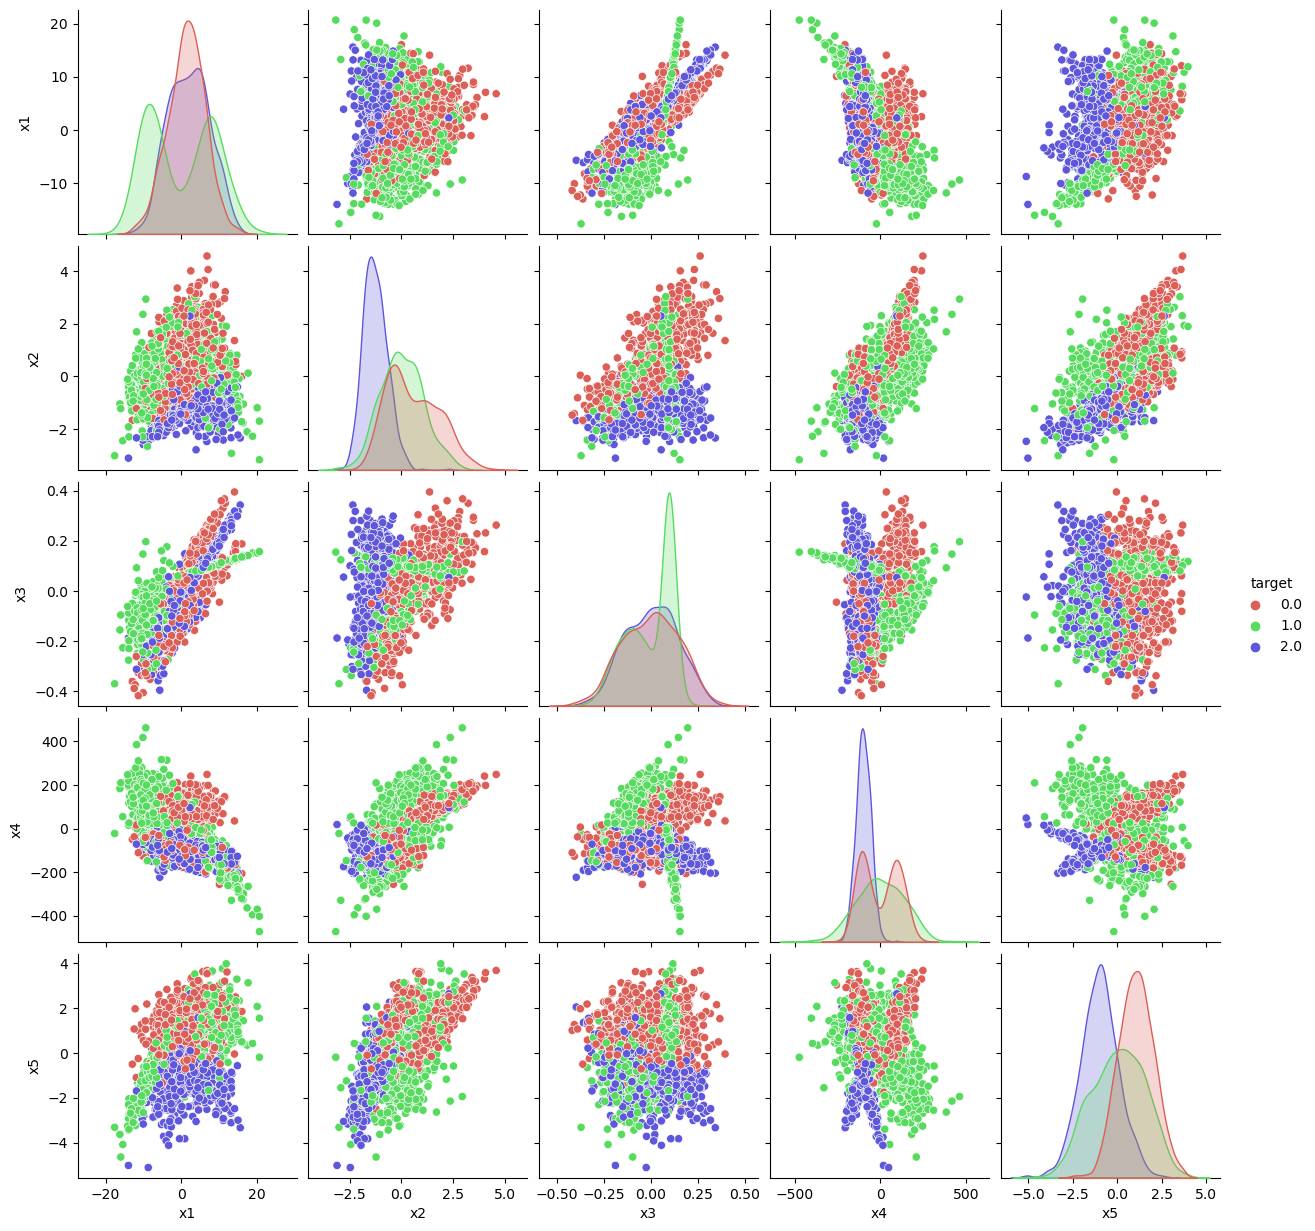

<Figure size 640x480 with 0 Axes>

In [7]:
# plot the distribution of the features
plt.show(sns.pairplot(df, hue='target', palette=color_palette("hls", 3)))
plt.clf()